In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1,1,2,0,0,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,7
2,2,2,1,0,0,0,3,0.0,2.0,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0,2,0.0,2.0,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,0,2,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0,0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1,NaN,70
355,2,2,2,1,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	69
float64		column 9	69
float64		column 10	69
int64		column 11	0
float64		column 12	69
int64		column 13	0
float64		column 14	17
int64		column 15	0
float64		column 16	69
int64		column 17	0
int64		column 18	0
float64		column 19	34
int64		column 20	0
float64		column 21	69
float64		column 22	69
float64		column 23	52
float64		column 24	69
float64		column 25	69
float64		column 26	52
float64		column 27	69
float64		column 28	52
float64		column 29	69
float64		column 30	69
float64		column 31	69
int64		column 32	0
float64		column 33	69
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,289.000000,289.000000,289.000000,...,289.000000,306.000000,289.000000,306.000000,289.000000,289.000000,289.000000,358.000000,289.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.170391,0.394464,0.615917,0.560554,...,0.408304,0.486928,0.487889,0.905229,0.491349,0.089965,0.089965,1.877095,0.564014,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.576394,0.860053,0.986659,0.922689,...,0.861644,0.876745,0.989893,1.107725,0.996920,0.431651,0.439621,0.699324,1.107214,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

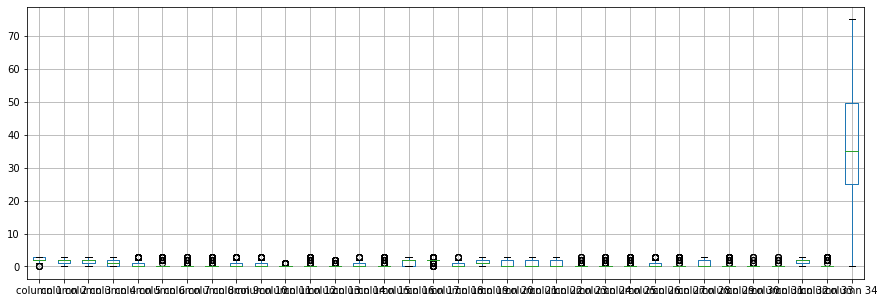

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.449721
column 7      0.170391
column 8      0.394464
column 9      0.615917
column 10     0.560554
column 11     0.122905
column 12     0.422145
column 13     0.142458
column 14     0.542522
column 15     0.315642
column 16     1.304498
column 17     1.955307
column 18     0.511173
column 19     1.317901
column 20     0.662011
column 21     1.020761
column 22     0.678201
column 23     0.294118
column 24     0.391003
column 25     0.408304
column 26     0.486928
column 27     0.487889
column 28     0.905229
column 29     0.491349
column 30     0.089965
column 31     0.089965
column 32     1.877095
column 33     0.564014
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.041712,0.165784,0.166903,...,-0.018595,0.156053,-0.003981,-0.022262,-0.009751,0.037593,0.049131,0.093026,-0.011684,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.080607,0.331329,0.324220,...,-0.082568,0.210996,-0.124133,-0.016853,-0.127479,-0.009988,-0.009807,-0.008453,-0.131309,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.274390,0.328035,0.257598,...,0.280806,0.344212,0.282993,-0.245569,0.270812,-0.045095,-0.079602,0.124812,0.275623,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.381677,-0.296342,-0.192871,...,0.393295,-0.200915,0.386491,0.018075,0.400806,-0.158162,-0.169022,0.051553,0.421446,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387979,-0.059448,-0.021673,...,0.393289,-0.018046,0.368742,0.038083,0.382348,-0.128324,-0.142894,0.110295,0.372234,0.081162
column 6,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.842762,-0.279553,-0.273835,...,0.870505,-0.117974,0.901681,0.108716,0.893651,-0.084104,-0.098715,0.258753,0.897908,0.096953
column 7,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.123628,0.152737,0.033434,...,-0.127730,-0.163416,-0.132852,-0.051273,-0.132852,0.755616,0.818559,-0.093833,-0.131221,-0.371368
column 8,-0.041712,-0.080607,0.274390,0.381677,0.387979,0.842762,-0.123628,1.000000,-0.287304,-0.279608,...,0.873623,-0.106989,0.870260,0.163984,0.862529,-0.067866,-0.094185,0.274697,0.877670,0.078582
column 9,0.165784,0.331329,0.328035,-0.296342,-0.059448,-0.279553,0.152737,-0.287304,1.000000,0.710256,...,-0.272331,0.494439,-0.287410,-0.444834,-0.287558,0.179249,0.192009,-0.031259,-0.300024,-0.067671
column 10,0.166903,0.324220,0.257598,-0.192871,-0.021673,-0.273835,0.033434,-0.279608,0.710256,1.000000,...,-0.275782,0.512161,-0.273858,-0.419969,-0.281594,-0.022444,0.020763,0.044460,-0.290153,0.077287


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [34,34+34,34+34+34,34+34+34+34,34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34+34+34,34+34+34+34+34+34+34,34+34+34+34+34+34,34+34+34+34+34,34+34+34+34,34+34+34,34+34,34], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 73.26548125527121
Epoch: 1 , loss: 72.63701126792215
Epoch: 2 , loss: 73.19933544505726
Epoch: 3 , loss: 72.95881340720437
Epoch: 4 , loss: 72.82955932617188
Epoch: 5 , loss: 72.25159003517844
Epoch: 6 , loss: 70.558837890625
Epoch: 7 , loss: 68.38189263777299
Epoch: 8 , loss: 67.55442862077193
Epoch: 9 , loss: 66.87523286992854
Epoch: 10 , loss: 65.83165914362127
Epoch: 11 , loss: 65.67648176713423
Epoch: 12 , loss: 65.20202428644353
Epoch: 13 , loss: 64.82501948963512
Epoch: 14 , loss: 64.49839661338113
Epoch: 15 , loss: 64.19839026711203
Epoch: 16 , loss: 63.83594443581321
Epoch: 17 , loss: 63.96106633273038
Epoch: 18 , loss: 63.51491199840199
Epoch: 19 , loss: 63.076315966519445
Epoch: 20 , loss: 62.825049833817914
Epoch: 21 , loss: 63.13808233087713
Epoch: 22 , loss: 62.42639576305043
Epoch: 23 , loss: 62.284803043712266
Epoch: 24 , loss: 62.20500998063521
Epoch: 25 , loss: 62.06660288030451
Epoch

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.296969
column 9      0.477666
column 10     0.442586
column 11     0.000000
column 12     0.253865
column 13     0.000000
column 14     0.311589
column 15     0.000000
column 16     0.887438
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.754183
column 22     0.410742
column 23     0.144680
column 24     0.253525
column 25     0.314517
column 26     0.268743
column 27     0.265897
column 28     0.000000
column 29     0.316881
column 30     0.024538
column 31    -0.009052
column 32     1.000000
column 33     0.354135
column 34    12.000000
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0,0,0.192669,-1.785209,-1.824827,...,0.213875,0.169894,0.168233,0.491290,0.199087,0.037386,0.005892,0,-1.777558,0
1,0,0,0,0,0,0,0,0.606753,-2.115479,0.662778,...,0.661940,0.462670,0.574154,1.332307,0.732538,-1.878703,-2.047676,0,0.770332,0
2,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
3,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
4,0,0,0,0,0,0,0,0.265196,-1.645292,0.435442,...,0.252547,0.000000,0.219838,-2.415139,0.267061,-1.956973,-2.006428,0,0.304349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
354,0,0,0,0,0,0,0,0.176831,-2.668281,-1.713843,...,0.186163,0.000000,0.166106,0.406334,0.202011,0.019205,-0.013268,0,0.218745,0
355,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0
356,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(32.108996585252, 758.0725558942231)

In [38]:
NRMS=numerator/denominator
NRMS


0.042356099473059274

In [39]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.277250
column 9      0.265247
column 10     0.339875
column 11     0.000000
column 12     0.283299
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     0.921748
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.527050
column 22     0.326592
column 23     0.118745
column 24     0.130761
column 25     0.323653
column 26     0.239349
column 27     0.291580
column 28     0.607019
column 29     0.335732
column 30     0.015534
column 31    -0.016806
column 32     2.000000
column 33     0.354880
column 34    22.000000
Name: 66, dtype: float64

In [40]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0,0,0.192669,0.214791,0.175173,...,0.213875,0.169894,0.168233,0.491290,0.199087,0.037386,0.005892,0,0.222442,0
1,1,1,2,0,0,0,3,0.606753,0.884521,0.662778,...,0.661940,0.462670,0.574154,1.332307,0.732538,0.121297,-0.047676,2,0.770332,7
2,2,2,1,0,0,0,3,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,3.000000,2,0.000000,7
3,2,2,2,1,0,0,2,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2,0.000000,7
4,2,2,1,0,0,0,2,0.265196,0.354708,0.435442,...,0.252547,0.000000,0.219838,0.584861,0.267061,0.043027,-0.006428,2,0.304349,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3,0.000000,70
354,2,3,2,0,0,0,0,0.176831,0.331719,0.286157,...,0.186163,0.000000,0.166106,0.406334,0.202011,0.019205,-0.013268,1,0.218745,70
355,2,2,2,1,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2,0.000000,70
356,2,1,0,3,0,0,0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,70


In [41]:
imputations[-1].to_excel("DERM_AE_10(imp).xlsx", index=False, header=False)